In [1]:
import pickle
import minority_report
import os
import pandas as pd
import numpy as np
import pickle
import itertools

import matplotlib.pyplot as plt

from datetime import datetime
from scipy.ndimage import gaussian_filter

from sklearn.model_selection import train_test_split

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import models, layers

### By week with no tuning

In [2]:

X_train_path = ('../raw_data/X_train_by_week.pickle')
X_test_path = ('../raw_data/X_test_by_week.pickle')
y_train_path = ('../raw_data/y_train_by_week.pickle')
y_test_path = ('../raw_data/y_test_by_week.pickle')



In [3]:
with open(X_train_path, 'rb') as f:
    X_train = pickle.load(f)
with open(X_test_path, 'rb') as f:
    X_test = pickle.load(f)
with open(y_train_path, 'rb') as f:
    y_train = pickle.load(f)
with open(y_test_path, 'rb') as f:
    y_test = pickle.load(f)

In [35]:
print('initializing model')
model = models.Sequential()
print('adding conv3D 1')
model.add(layers.Conv3D(64, kernel_size = (4,4,4), activation = 'relu', padding='same',
                    input_shape = (64, 22, 8,1)))

print('adding MaxPooling')

model.add(layers.MaxPooling3D(2))
print('Flattening')
model.add(layers.Flatten())
print('Adding Dense Layer')
model.add(layers.Dense(64*22*4, activation = 'relu'))
print('Reshaping')
model.add(layers.Reshape((64,22,4)))
print('Compiling')
model.compile(loss ='mse',
             optimizer='adam',
             metrics='mae')
print('Done !')
model

initializing model
adding conv3D 1
adding MaxPooling
Flattening
Adding Dense Layer
Reshaping
Compiling
Done !


In [36]:
X_train.shape

(16, 64, 22, 8, 1)

In [37]:
X_train.shape[1]

64

In [38]:
X_train.shape[2]

22

In [8]:
X_train.shape[2]

22

In [39]:
X_train = X_train.reshape(-1, X_train.shape[1], X_train.shape[2], X_train.shape[3], 1)
epochs= 100
es = EarlyStopping(patience = 5, restore_best_weights=True)
model.fit(X_train, y_train,batch_size = 32, epochs = epochs, validation_split = 0.3,callbacks = es)
model

Epoch 1/100


KeyboardInterrupt: 

In [ ]:
model.summary()

In [ ]:
X_test = X_test.reshape(-1, X_test.shape[1], X_test.shape[2], X_test.shape[3], 1)

X_test.shape

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
y_pred.shape

In [ ]:
model.evaluate(X_test,y_test)

In [ ]:
fig,axes = plt.subplots(y_pred.shape[3],2, figsize=(20,10))
for i in range(y_pred.shape[3]):
    axes[i,0].imshow(y_pred[0,:,:,i])
    axes[i,1].imshow(y_pred[0,:,:,i]) 

### BASELINE MODEL 

In [65]:
y_pred = np.zeros((y_test[0].shape))

y_pred.shape

(64, 22, 4)

In [66]:
error = y_test[0] - y_pred

In [67]:
mse = np.sum(error**2)/(y_pred.shape[1]*y_pred.shape[2]) #Mean squared error sur un y_pred qui predit des 0
mse

16.46832904645461

In [80]:
average = y_test[0].mean()

y_pred_2 = np.full(y_test[0].shape, average)

In [81]:
error_2 = y_test[0] - y_pred_2

In [82]:
mse_2 = np.sum(error_2**2)/(y_pred_2.shape[1]*y_pred_2.shape[2]) #Mean squared error sur un y_pred qui predit des 0
mse_2

14.332843556968333

### By WEEK: first draft tuning with one more layerconv3D + maxpoolD 

In [83]:
print('initializing model')
model_two = models.Sequential()

print('adding conv3D 1') #1.changing to 32 numbers of neurons
model_two.add(layers.Conv3D(32, kernel_size = (4,4,4), strides=(1,1,1 ),activation = 'relu', padding='same', input_shape = (64, 22, 8,1))) #changing stride,
print('adding MaxPooling')
model_two.add(layers.MaxPooling3D(2))

#2.added a second layer of CONV3D with 64 neurons, kernel smaller 3 + a maxpooling 2
model_two.add(layers.Conv3D(64, kernel_size = (3,3,3),activation = 'relu' )) #adding a layer conv3D + MaxPool3D
model_two.add(layers.MaxPool3D(pool_size=(2,2,2)))


print('Flattening')
model_two.add(layers.Flatten())

print('Adding Dense Layer')
model_two.add(layers.Dense(64*22*4, activation = 'relu'))

#3.adding an other dense layer
model_two.add(layers.Dense(64*22*4, activation='relu'))

print('Reshaping')
model_two.add(layers.Reshape((64,22,4)))
print('Compiling')
model_two.compile(loss ='mse',
             optimizer='adam',
             metrics='mae')
print('Done !')
model_two

initializing model
adding conv3D 1
adding MaxPooling
Flattening
Adding Dense Layer
Reshaping
Compiling
Done !


In [84]:
X_train = X_train.reshape(-1, X_train.shape[1], X_train.shape[2], X_train.shape[3], 1)
epochs= 400
es = EarlyStopping(patience = 5, restore_best_weights=True, verbose=0, monitor='val_loss', mode='min')

model_two.fit(X_train, y_train,batch_size = 32, epochs = epochs, validation_split = 0.3,callbacks = es)
model_two

Epoch 1/400
1/1 [==============================] - 2s 2s/step - loss: 0.2616 - mae: 0.2134 - val_loss: 0.1559 - val_mae: 0.1507
Epoch 2/400
1/1 [==============================] - 1s 1s/step - loss: 0.1562 - mae: 0.1502 - val_loss: 0.1141 - val_mae: 0.1085
Epoch 3/400
1/1 [==============================] - 1s 1s/step - loss: 0.1141 - mae: 0.1074 - val_loss: 0.1669 - val_mae: 0.1439
Epoch 4/400
1/1 [==============================] - 1s 1s/step - loss: 0.1641 - mae: 0.1426 - val_loss: 0.1002 - val_mae: 0.1025
Epoch 5/400
1/1 [==============================] - 1s 1s/step - loss: 0.0995 - mae: 0.1012 - val_loss: 0.1262 - val_mae: 0.1227
Epoch 6/400
1/1 [==============================] - 1s 1s/step - loss: 0.1257 - mae: 0.1219 - val_loss: 0.1236 - val_mae: 0.1197
Epoch 7/400
1/1 [==============================] - 1s 1s/step - loss: 0.1229 - mae: 0.1189 - val_loss: 0.1059 - val_mae: 0.1095
Epoch 8/400
1/1 [==============================] - 1s 1s/step - loss: 0.1048 - mae: 0.1084 - val_loss: 0

1/1 [==============================] - 1s 1s/step - loss: 0.0552 - mae: 0.0608 - val_loss: 0.0579 - val_mae: 0.0666
Epoch 65/400
1/1 [==============================] - 1s 1s/step - loss: 0.0550 - mae: 0.0604 - val_loss: 0.0576 - val_mae: 0.0663
Epoch 66/400
1/1 [==============================] - 1s 1s/step - loss: 0.0548 - mae: 0.0601 - val_loss: 0.0575 - val_mae: 0.0662
Epoch 67/400
1/1 [==============================] - 1s 1s/step - loss: 0.0546 - mae: 0.0599 - val_loss: 0.0574 - val_mae: 0.0660
Epoch 68/400
1/1 [==============================] - 1s 1s/step - loss: 0.0545 - mae: 0.0597 - val_loss: 0.0573 - val_mae: 0.0658
Epoch 69/400
1/1 [==============================] - 1s 1s/step - loss: 0.0544 - mae: 0.0595 - val_loss: 0.0570 - val_mae: 0.0656
Epoch 70/400
1/1 [==============================] - 1s 1s/step - loss: 0.0542 - mae: 0.0593 - val_loss: 0.0567 - val_mae: 0.0651
Epoch 71/400
1/1 [==============================] - 1s 1s/step - loss: 0.0539 - mae: 0.0589 - val_loss: 0.0563

1/1 [==============================] - 1s 1s/step - loss: 0.0439 - mae: 0.0441 - val_loss: 0.0448 - val_mae: 0.0473
Epoch 128/400
1/1 [==============================] - 1s 1s/step - loss: 0.0439 - mae: 0.0440 - val_loss: 0.0448 - val_mae: 0.0472
Epoch 129/400
1/1 [==============================] - 1s 1s/step - loss: 0.0439 - mae: 0.0439 - val_loss: 0.0448 - val_mae: 0.0471
Epoch 130/400
1/1 [==============================] - 1s 1s/step - loss: 0.0439 - mae: 0.0438 - val_loss: 0.0448 - val_mae: 0.0470
Epoch 131/400
1/1 [==============================] - 1s 1s/step - loss: 0.0438 - mae: 0.0438 - val_loss: 0.0447 - val_mae: 0.0470
Epoch 132/400
1/1 [==============================] - 1s 1s/step - loss: 0.0438 - mae: 0.0437 - val_loss: 0.0447 - val_mae: 0.0469
Epoch 133/400
1/1 [==============================] - 1s 1s/step - loss: 0.0438 - mae: 0.0436 - val_loss: 0.0447 - val_mae: 0.0468
Epoch 134/400
1/1 [==============================] - 1s 1s/step - loss: 0.0438 - mae: 0.0436 - val_loss:

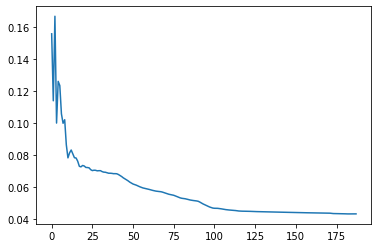

In [86]:
plt.plot(model_two.history.history['val_loss'])

In [55]:
model_two.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_20 (Conv3D)           (None, 64, 22, 8, 32)     2080      
_________________________________________________________________
max_pooling3d_16 (MaxPooling (None, 32, 11, 4, 32)     0         
_________________________________________________________________
conv3d_21 (Conv3D)           (None, 30, 9, 2, 64)      55360     
_________________________________________________________________
max_pooling3d_17 (MaxPooling (None, 15, 4, 1, 64)      0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 3840)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 5632)              21632512  
_________________________________________________________________
reshape_5 (Reshape)          (None, 64, 22, 4)        

In [56]:
X_test = X_test.reshape(-1, X_test.shape[1], X_test.shape[2], X_test.shape[3], 1)

X_test.shape

(4, 64, 22, 8, 1)

In [57]:
y_pred_two = model_two.predict(X_test)

In [58]:
y_pred_two.shape

(4, 64, 22, 4)

In [59]:
model_two.evaluate(X_test,y_test)

1/1 [==============================] - 0s 71ms/step - loss: 0.0402 - mae: 0.0472


[0.040209200233221054, 0.047231175005435944]

In [60]:
import matplotlib.pyplot as plt

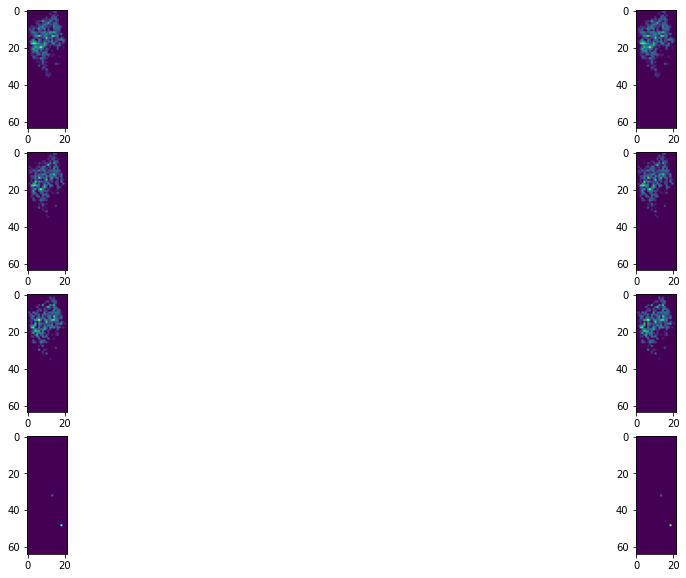

In [61]:
fig,axes = plt.subplots(y_pred_two.shape[3],2, figsize=(20,10))
for i in range(y_pred_two.shape[3]):
    axes[i,0].imshow(y_pred_two[0,:,:,i])
    axes[i,1].imshow(y_pred_two[0,:,:,i]) 

### MODEL 3 

In [40]:
print('initializing model')
model_three = models.Sequential()

print('adding conv3D 1') #1.changing to 32 numbers of neurons
model_three.add(layers.Conv3D(32, kernel_size = (4,4,4), strides=(1,1,1 ),activation = 'relu', padding='same', input_shape = (64, 22, 8,1))) #changing stride,
print('adding MaxPooling')
model_three.add(layers.MaxPooling3D(2))

#2.added a second layer of CONV3D with 64 neurons, kernel smaller 3 + a maxpooling 2
model_three.add(layers.Conv3D(64, kernel_size = (3,3,3),activation = 'relu' )) #adding a layer conv3D + MaxPool3D
model_three.add(layers.MaxPool3D(pool_size=(2,2,2)))


print('Flattening')
model_three.add(layers.Flatten())

print('Adding Dense Layer')
model_three.add(layers.Dense(64*22*4, activation = 'relu'))

#3.adding an other dense layer
model.add(layers.Dense(64*22*4, activation='relu'))

print('Reshaping')
model_three.add(layers.Reshape((64,22,4)))
print('Compiling')
model_three.compile(loss ='mse',
             optimizer='adam',
             metrics='mae')
print('Done !')
model_three

initializing model
adding conv3D 1
adding MaxPooling
Flattening
Adding Dense Layer
Reshaping
Compiling
Done !


In [87]:
X_train = X_train.reshape(-1, X_train.shape[1], X_train.shape[2], X_train.shape[3], 1)
epochs= 200
es = EarlyStopping(patience = 5, restore_best_weights=True, verbose=0, monitor='val_loss', mode='min')

model_three.fit(X_train, y_train,batch_size = 32, epochs = epochs, validation_split = 0.3,callbacks = es)
model_three

Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 0.0874 - mae: 0.0850 - val_loss: 0.0890 - val_mae: 0.0880
Epoch 2/200
1/1 [==============================] - 1s 1s/step - loss: 0.0871 - mae: 0.0847 - val_loss: 0.0886 - val_mae: 0.0876
Epoch 3/200
1/1 [==============================] - 1s 1s/step - loss: 0.0867 - mae: 0.0843 - val_loss: 0.0881 - val_mae: 0.0873
Epoch 4/200
1/1 [==============================] - 1s 996ms/step - loss: 0.0861 - mae: 0.0840 - val_loss: 0.0876 - val_mae: 0.0871
Epoch 5/200
1/1 [==============================] - 1s 978ms/step - loss: 0.0856 - mae: 0.0837 - val_loss: 0.0871 - val_mae: 0.0867
Epoch 6/200
1/1 [==============================] - 1s 983ms/step - loss: 0.0850 - mae: 0.0833 - val_loss: 0.0864 - val_mae: 0.0861
Epoch 7/200
1/1 [==============================] - 1s 997ms/step - loss: 0.0844 - mae: 0.0825 - val_loss: 0.0859 - val_mae: 0.0856
Epoch 8/200
1/1 [==============================] - 1s 961ms/step - loss: 0.0839 - mae: 0.081

Epoch 64/200
1/1 [==============================] - 1s 824ms/step - loss: 0.0613 - mae: 0.0562 - val_loss: 0.0613 - val_mae: 0.0597
Epoch 65/200
1/1 [==============================] - 1s 825ms/step - loss: 0.0609 - mae: 0.0558 - val_loss: 0.0610 - val_mae: 0.0594
Epoch 66/200
1/1 [==============================] - 1s 841ms/step - loss: 0.0607 - mae: 0.0556 - val_loss: 0.0609 - val_mae: 0.0591
Epoch 67/200
1/1 [==============================] - 1s 843ms/step - loss: 0.0605 - mae: 0.0553 - val_loss: 0.0607 - val_mae: 0.0588
Epoch 68/200
1/1 [==============================] - 1s 832ms/step - loss: 0.0604 - mae: 0.0551 - val_loss: 0.0606 - val_mae: 0.0586
Epoch 69/200
1/1 [==============================] - 1s 848ms/step - loss: 0.0603 - mae: 0.0549 - val_loss: 0.0604 - val_mae: 0.0584
Epoch 70/200
1/1 [==============================] - 1s 828ms/step - loss: 0.0601 - mae: 0.0547 - val_loss: 0.0602 - val_mae: 0.0581
Epoch 71/200
1/1 [==============================] - 1s 817ms/step - loss: 0.